In [11]:
import os
import csv
import pickle
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from collections import defaultdict

from utils import savefig

plt.rcParams['font.size'] = 14

## Vary temporal discount factor

### Different temporal discount factor

load data of each temporal factor to a dict (20 models each)

In [3]:
exp_names = []
temporal_discount_factors = []
exp_names.append("setup_gru_negmementreg")
temporal_discount_factors.append(0.0)
for i in range(1, 10):
    exp_names.append("setup_gru_negmementreg_gamma0{}".format(i))
    temporal_discount_factors.append(float(i)/10)
exp_names.append("setup_gru_negmementreg_gamma")
temporal_discount_factors.append(1.0)

accuracy_dict = defaultdict(list)
forward_asymmetry_dict = defaultdict(list)
temporal_factor_dict = defaultdict(list)
# index_decoding_acc_dict = defaultdict(list)

item_enc_r2_dict = defaultdict(list)
item_enc_r2_last_dict = defaultdict(list)
index_enc_r2_dict = defaultdict(list)
index_cluster_rand_index = defaultdict(list)

item_enc_r2_classi_dict = defaultdict(list)
item_enc_r2_last_classi_dict = defaultdict(list)
index_enc_r2_classi_dict = defaultdict(list)
item_enc_acc_dict = defaultdict(list)
item_enc_acc_last_dict = defaultdict(list)
index_enc_acc_dict = defaultdict(list)

item_enc_r2_svm_dict = defaultdict(list)
item_enc_r2_last_svm_dict = defaultdict(list)
index_enc_r2_svm_dict = defaultdict(list)
item_enc_acc_svm_dict = defaultdict(list)
item_enc_acc_last_svm_dict = defaultdict(list)
index_enc_acc_svm_dict = defaultdict(list)



for exp in exp_names:
    for i in range(20):
        run_name = exp + "-{}".format(i)
        with open("./experiments/RL/figures/cogsci/ValueMemoryGRU/{}/contiguity_effect.csv".format(run_name), "r") as f:
            reader = csv.reader(f)
            for row in reader:
                if float(row[0])>=0.65:
                    accuracy_dict[exp].append(float(row[0]))
                    forward_asymmetry_dict[exp].append(float(row[1]))
                    temporal_factor_dict[exp].append(float(row[2]))
                    # data = np.load("./experiments/RL/figures/cogsci/ValueMemoryGRU/{}/pc_selectivity_encoding.npz".format(run_name), allow_pickle=True)
                    # index_decoding_acc_dict[exp].append(data['selectivity'][1][-1])

                    ridge_regresson_stat = pickle.load(open("./experiments/RL/figures/ValueMemoryGRUOld/{}/{}/ridge_regression_stat.pkl".format(exp, i), "rb"))
                    item_enc_r2_dict[exp].append(ridge_regresson_stat['item_enc_r2'])
                    item_enc_r2_last_dict[exp].append(ridge_regresson_stat['item_enc_r2_last'])
                    index_enc_r2_dict[exp].append(ridge_regresson_stat['index_enc_r2'])

                    kmeans_stat = pickle.load(open("./experiments/RL/figures/ValueMemoryGRUOld/{}/{}/kmeans_stat.pkl".format(exp, i), "rb"))
                    index_cluster_rand_index[exp].append(kmeans_stat['rand_index_enc'])

                    ridge_classifier_stat = pickle.load(open("./experiments/RL/figures/ValueMemoryGRUOld/{}/{}/ridge_classifier_stat.pkl".format(exp, i), "rb"))
                    item_enc_r2_classi_dict[exp].append(ridge_classifier_stat['item_enc_r2'])
                    item_enc_r2_last_classi_dict[exp].append(ridge_classifier_stat['item_enc_r2_last'])
                    index_enc_r2_classi_dict[exp].append(ridge_classifier_stat['index_enc_r2'])
                    item_enc_acc_dict[exp].append(ridge_classifier_stat['item_enc_acc'])
                    item_enc_acc_last_dict[exp].append(ridge_classifier_stat['item_enc_acc_last'])
                    index_enc_acc_dict[exp].append(ridge_classifier_stat['index_enc_acc'])


item_enc_r2_mean, item_enc_r2_std = [], []
item_enc_r2_last_mean, item_enc_r2_last_std = [], []
index_enc_r2_mean, index_enc_r2_std = [], []
index_cluster_rand_index_mean, index_cluster_rand_index_std = [], []
item_enc_r2_classi_mean, item_enc_r2_classi_std = [], []
item_enc_r2_last_classi_mean, item_enc_r2_last_classi_std = [], []
index_enc_r2_classi_mean, index_enc_r2_classi_std = [], []
item_enc_acc_mean, item_enc_acc_std = [], []
item_enc_acc_last_mean, item_enc_acc_last_std = [], []
index_enc_acc_mean, index_enc_acc_std = [], []

item_enc_r2_svm_mean, item_enc_r2_svm_std = [], []
item_enc_r2_last_svm_mean, item_enc_r2_last_svm_std = [], []
index_enc_r2_svm_mean, index_enc_r2_svm_std = [], []

for exp in exp_names:
    item_enc_r2_mean.append(np.mean(item_enc_r2_dict[exp]))
    item_enc_r2_std.append(np.std(item_enc_r2_dict[exp]))

    item_enc_r2_last_mean.append(np.mean(item_enc_r2_last_dict[exp]))
    item_enc_r2_last_std.append(np.std(item_enc_r2_last_dict[exp]))

    index_enc_r2_mean.append(np.mean(index_enc_r2_dict[exp]))
    index_enc_r2_std.append(np.std(index_enc_r2_dict[exp]))

    index_cluster_rand_index_mean.append(np.mean(index_cluster_rand_index[exp]))
    index_cluster_rand_index_std.append(np.std(index_cluster_rand_index[exp]))

    item_enc_r2_classi_mean.append(np.mean(item_enc_r2_classi_dict[exp]))
    item_enc_r2_classi_std.append(np.std(item_enc_r2_classi_dict[exp]))

    item_enc_r2_last_classi_mean.append(np.mean(item_enc_r2_last_classi_dict[exp]))
    item_enc_r2_last_classi_std.append(np.std(item_enc_r2_last_classi_dict[exp]))

    index_enc_r2_classi_mean.append(np.mean(index_enc_r2_classi_dict[exp]))
    index_enc_r2_classi_std.append(np.std(index_enc_r2_classi_dict[exp]))



Change of each data with temporal discount factor

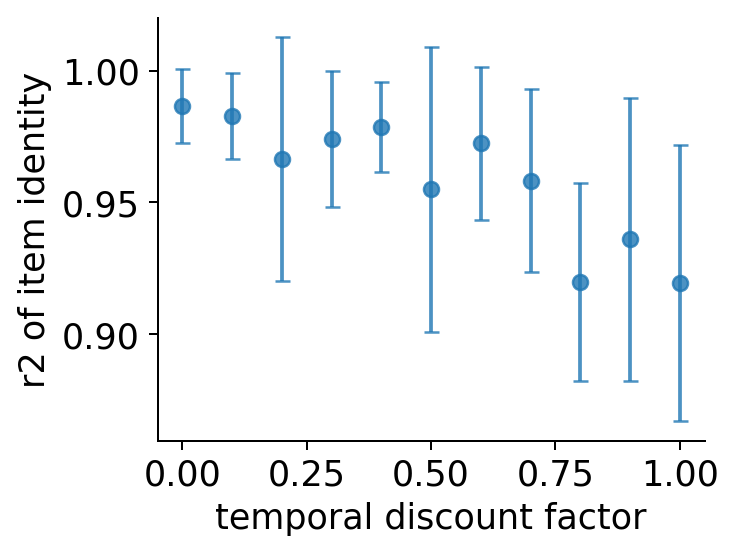

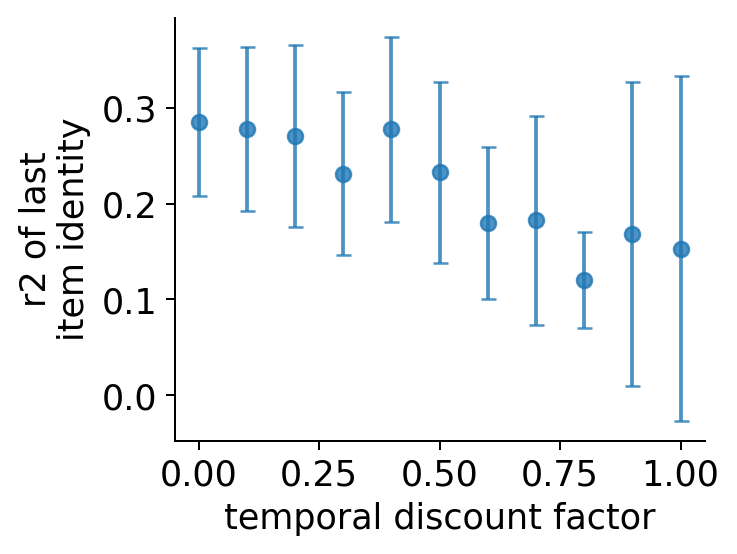

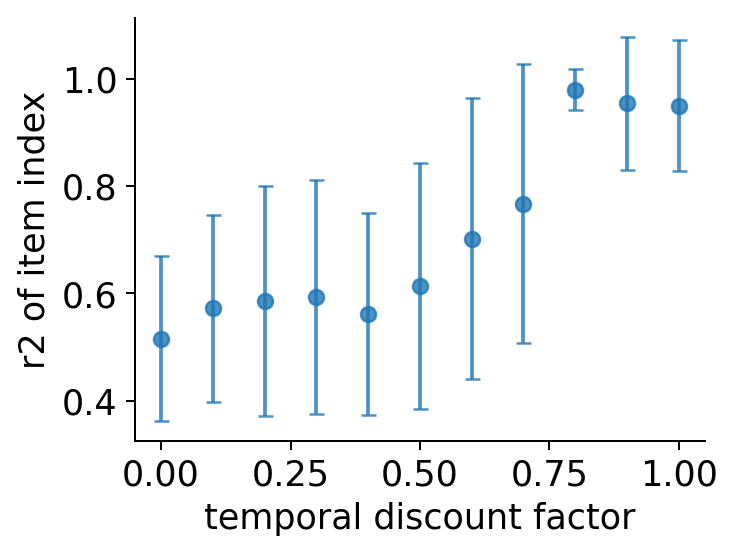

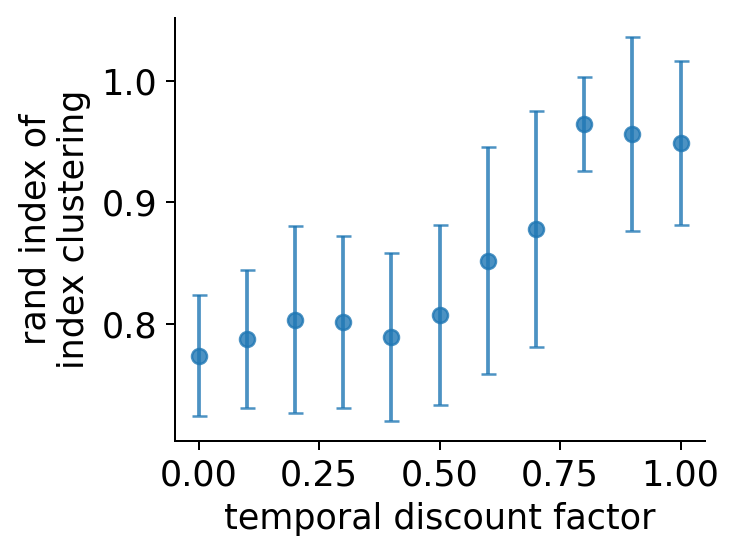

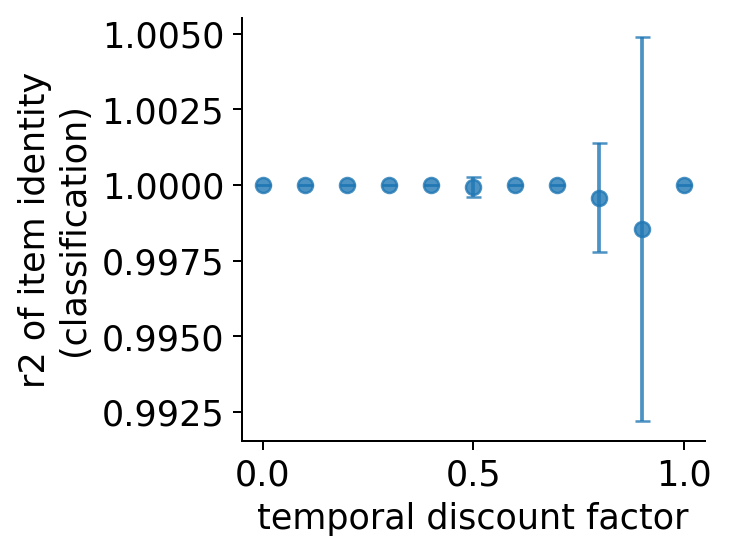

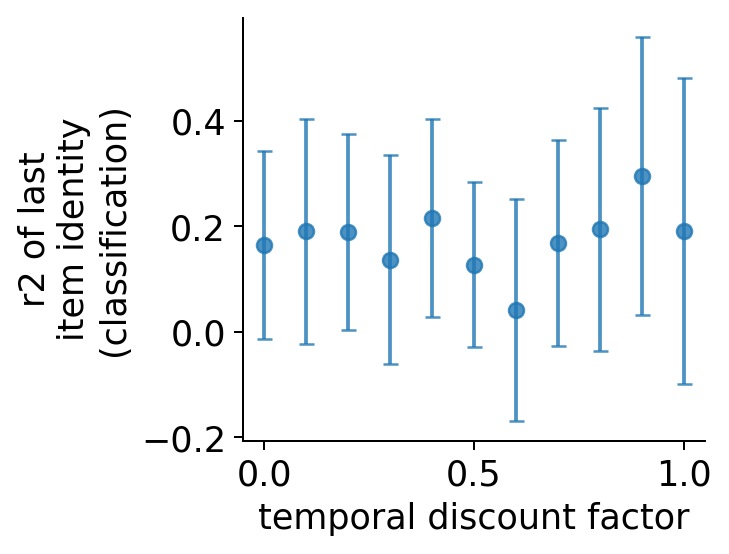

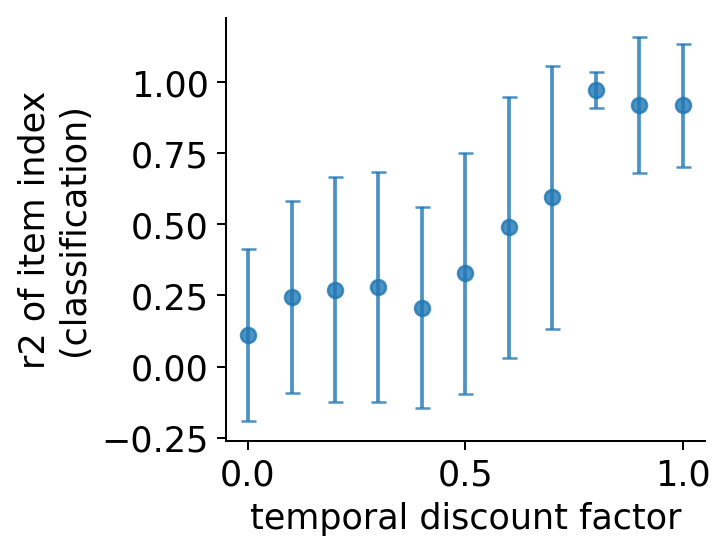

In [9]:
def plot_mean_std(x, y, yerr, x_label, y_label, figname=None):
    fig = plt.figure(figsize=(4.3, 3.3), dpi=180)
    plt.errorbar(x, y, yerr=yerr, fmt='o', alpha=0.8, capsize=3, color='tab:blue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    if figname:
        savefig("./figures/vary_gamma", figname)
    else:
        plt.show()

plot_mean_std(temporal_discount_factors, item_enc_r2_mean, item_enc_r2_std, "temporal discount factor", "r2 of item identity")
plot_mean_std(temporal_discount_factors, item_enc_r2_last_mean, item_enc_r2_last_std, "temporal discount factor", "r2 of last\nitem identity")
plot_mean_std(temporal_discount_factors, index_enc_r2_mean, index_enc_r2_std, "temporal discount factor", "r2 of item index")
plot_mean_std(temporal_discount_factors, index_cluster_rand_index_mean, index_cluster_rand_index_std, "temporal discount factor", 
    "rand index of\nindex clustering")

plot_mean_std(temporal_discount_factors, item_enc_r2_classi_mean, item_enc_r2_classi_std, "temporal discount factor", "r2 of item identity\n(classification)")
plot_mean_std(temporal_discount_factors, item_enc_r2_last_classi_mean, item_enc_r2_last_classi_std, "temporal discount factor", "r2 of last\nitem identity\n(classification)")
plot_mean_std(temporal_discount_factors, index_enc_r2_classi_mean, index_enc_r2_classi_std, "temporal discount factor", "r2 of item index\n(classification)")

# plot_mean_std(temporal_discount_factors, item_enc_r2_mean, item_enc_r2_std, "temporal discount factor", "r2 of item identity", "item_enc_r2")
# plot_mean_std(temporal_discount_factors, item_enc_ev_mean, item_enc_ev_std, "temporal discount factor", "explained variance\nof item identity", "item_enc_ev")
# plot_mean_std(temporal_discount_factors, item_enc_r2_last_mean, item_enc_r2_last_std, "temporal discount factor", "r2 of last\nitem identity", "item_enc_r2_last")
# plot_mean_std(temporal_discount_factors, item_enc_ev_last_mean, item_enc_ev_last_std, "temporal discount factor", "explained variance of\nlast item identity", 
#     "item_enc_ev_last")
# plot_mean_std(temporal_discount_factors, index_enc_r2_mean, index_enc_r2_std, "temporal discount factor", "r2 of item index", "index_enc_r2")
# plot_mean_std(temporal_discount_factors, index_enc_ev_mean, index_enc_ev_std, "temporal discount factor", "explained variance\nof item index", "index_enc_ev")
# plot_mean_std(temporal_discount_factors, index_cluster_rand_index_mean, index_cluster_rand_index_std, "temporal discount factor", 
#     "rand index of\nindex clustering", "index_cluster_rand_index")
# plot_mean_std(temporal_discount_factors, index_cluster_adj_mutual_info_mean, index_cluster_adj_mutual_info_std, "temporal discount factor",
#     "adjusted mutual info\nof index clustering", "index_cluster_adj_mutual_info")


### 100 models of gamma = 0.6

load data of gamma = 0.6 to a list (100 models)

In [8]:
exp = "setup_gru_negmementreg_gamma06"

accuracy_list = []
forward_asymmetry_list = []
temporal_factor_list = []
# index_decoding_acc_list = []

item_enc_r2_list = []
item_enc_ev_list = []
item_enc_r2_last_list = []
item_enc_ev_last_list = []
index_enc_r2_list = []
index_enc_ev_list = []
index_cluster_rand_index_list = []
index_cluster_adj_mutual_info_list = []

item_enc_r2_classi_list = []
item_enc_acc_list = []
item_enc_r2_last_classi_list = []
item_enc_acc_last_list = []
index_enc_r2_classi_list = []
index_enc_acc_list = []

item_enc_r2_svm_list = []
item_enc_r2_last_svm_list = []
index_enc_r2_svm_list = []
item_enc_acc_svm_list = []
item_enc_acc_last_svm_list = []
index_enc_acc_svm_list = []


for i in range(100):
    run_name = exp + "-{}".format(i)
    with open("./experiments/RL/figures/ValueMemoryGRUOld/{}/{}/contiguity_effect.csv".format(exp, i), "r") as f:
        reader = csv.reader(f)
        for row in reader:
            if float(row[0])>=0.65 and os.path.exists("./experiments/RL/figures/ValueMemoryGRUOld/{}/{}/svm_classifier_stat.pkl".format(exp, i)):
                accuracy_list.append(float(row[0]))
                forward_asymmetry_list.append(float(row[1]))
                temporal_factor_list.append(float(row[2]))
                # data = np.load("./experiments/RL/figures/ValueMemoryGRUOld/{}/{}/pc_selectivity_encoding.npz".format(exp, i), allow_pickle=True)
                # index_decoding_acc_list.append(data['selectivity'][1][-1])
                ridge_regresson_stat = pickle.load(open("./experiments/RL/figures/ValueMemoryGRUOld/{}/{}/ridge_regression_stat.pkl".format(exp, i), "rb"))
                item_enc_r2_list.append(ridge_regresson_stat['item_enc_r2'])
                item_enc_ev_list.append(ridge_regresson_stat['item_enc_ev'])
                item_enc_r2_last_list.append(ridge_regresson_stat['item_enc_r2_last'])
                item_enc_ev_last_list.append(ridge_regresson_stat['item_enc_ev_last'])
                index_enc_r2_list.append(ridge_regresson_stat['index_enc_r2'])
                index_enc_ev_list.append(ridge_regresson_stat['index_enc_ev'])

                kmeans_stat = pickle.load(open("./experiments/RL/figures/ValueMemoryGRUOld/{}/{}/kmeans_stat.pkl".format(exp, i), "rb"))
                index_cluster_rand_index_list.append(kmeans_stat['rand_index_enc'])
                index_cluster_adj_mutual_info_list.append(kmeans_stat['adj_mutual_info_enc'])

                ridge_classifier_stat = pickle.load(open("./experiments/RL/figures/ValueMemoryGRUOld/{}/{}/ridge_classifier_stat.pkl".format(exp, i), "rb"))
                item_enc_r2_classi_list.append(ridge_classifier_stat['item_enc_r2'])
                item_enc_acc_list.append(ridge_classifier_stat['item_enc_acc'])
                item_enc_r2_last_classi_list.append(ridge_classifier_stat['item_enc_r2_last'])
                item_enc_acc_last_list.append(ridge_classifier_stat['item_enc_acc_last'])
                index_enc_r2_classi_list.append(ridge_classifier_stat['index_enc_r2'])
                index_enc_acc_list.append(ridge_classifier_stat['index_enc_acc'])

                svm_classifier_stat = pickle.load(open("./experiments/RL/figures/ValueMemoryGRUOld/{}/{}/svm_classifier_stat.pkl".format(exp, i), "rb"))
                item_enc_r2_svm_list.append(svm_classifier_stat['item_enc_r2'])
                item_enc_r2_last_svm_list.append(svm_classifier_stat['item_enc_r2_last'])
                index_enc_r2_svm_list.append(svm_classifier_stat['index_enc_r2'])
                item_enc_acc_svm_list.append(svm_classifier_stat['item_enc_acc'])
                item_enc_acc_last_svm_list.append(svm_classifier_stat['item_enc_acc_last'])
                index_enc_acc_svm_list.append(svm_classifier_stat['index_enc_acc'])



plot the relation of different data

In [21]:
def plot_scatter(x, y, x_label, y_label, figname=None):
    plt.figure(figsize=(4, 3.5), dpi=180)
    plt.scatter(x, y, alpha=0.5)

    # plt.scatter([x[9]], [y[9]], color='k', alpha=0.5)
    # plt.text(x[9]-0.02, y[9]-0.02, "1", fontsize=11)
    # plt.scatter([x[62]], [y[62]], color='k', alpha=0.5)
    # plt.text(x[62]-0.02, y[62]+0.02, "2", fontsize=11)
    # plt.scatter([x[14]], [y[14]], color='k', alpha=0.5)
    # plt.text(x[14]-0.02, y[14]+0.02, "3", fontsize=11)
    # plt.scatter([x[18]], [y[18]], color='k', alpha=0.5)
    # plt.text(x[18]-0.02, y[18]+0.02, "4", fontsize=11)

    # plt.plot([fit_line_point1[0], fit_line_point2[0]], [fit_line_point1[1], fit_line_point2[1]], color='k', linestyle='--')
    # plt.text((np.max(temporal_factor_list)+np.min(temporal_factor_list))/2, 0.98, "$r^2$={:.2f}".format(score), fontsize=11)
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    if figname:
        savefig("./figures/scatter", figname)
    else:
        plt.show()


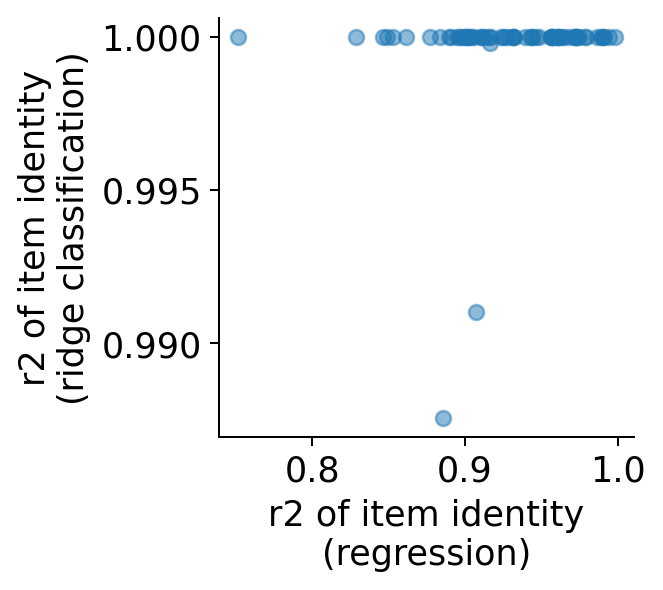

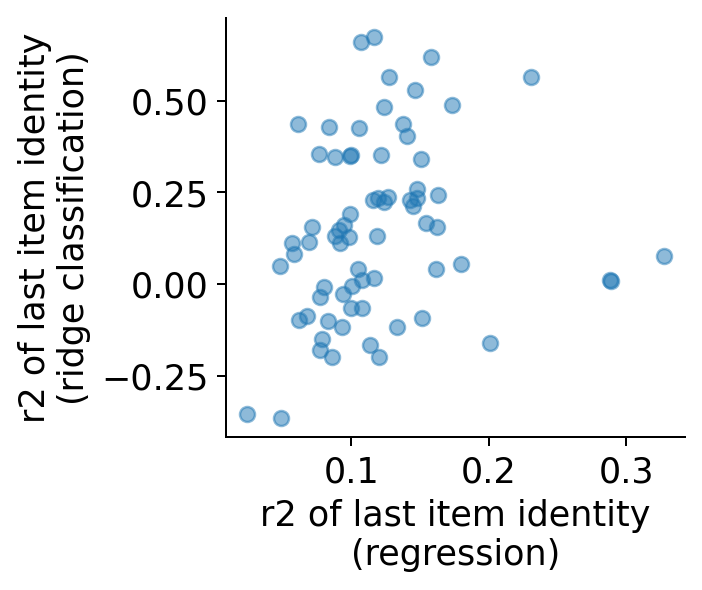

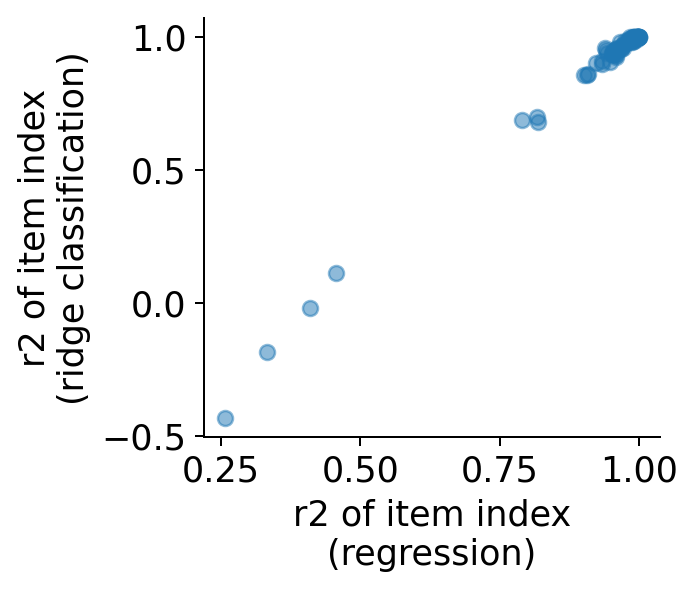

In [27]:
""" relation between classification and regression, and r2 and accuracy """

plot_scatter(item_enc_r2_list, item_enc_r2_classi_list, "r2 of item identity\n(regression)", "r2 of item identity\n(ridge classification)")
plot_scatter(item_enc_r2_last_list, item_enc_r2_last_classi_list, "r2 of last item identity\n(regression)", "r2 of last item identity\n(ridge classification)")
plot_scatter(index_enc_r2_list, index_enc_r2_classi_list, "r2 of item index\n(regression)", "r2 of item index\n(ridge classification)")


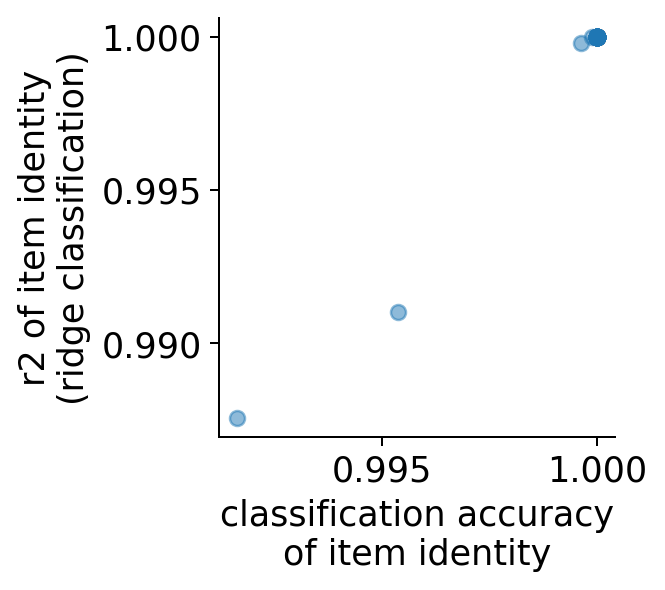

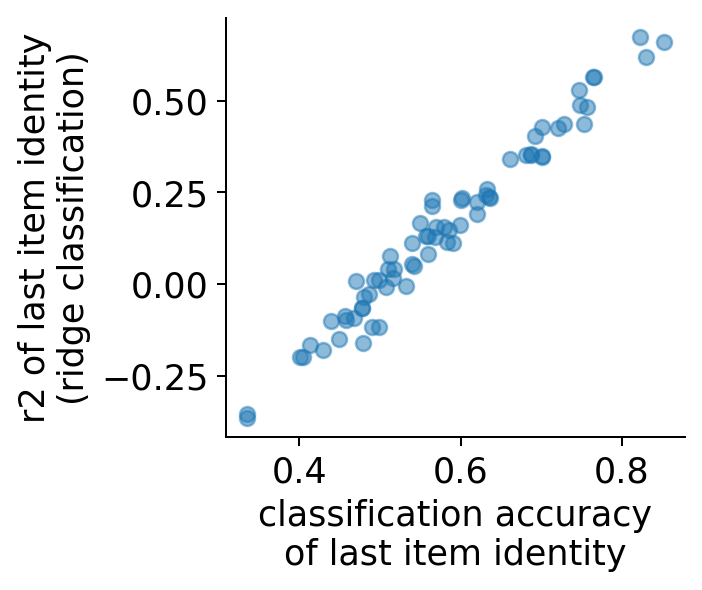

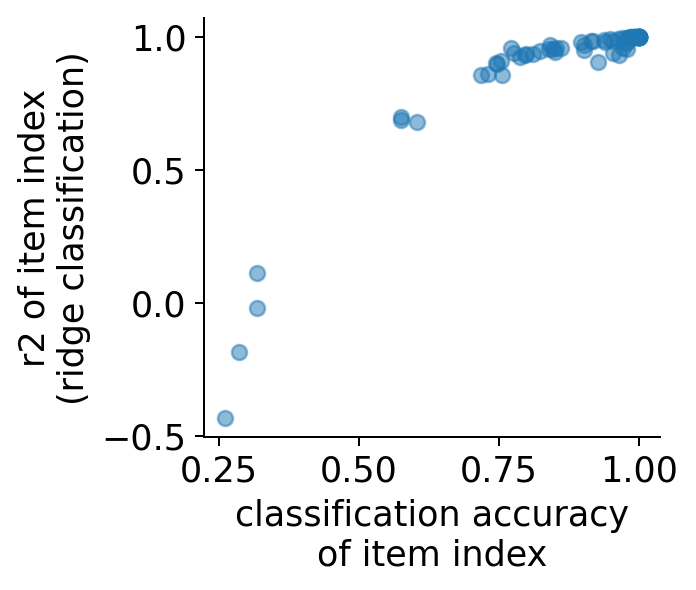

In [23]:
plot_scatter(item_enc_acc_list, item_enc_r2_classi_list, "classification accuracy\nof item identity", "r2 of item identity\n(ridge classification)")
plot_scatter(item_enc_acc_last_list, item_enc_r2_last_classi_list, "classification accuracy\nof last item identity", "r2 of last item identity\n(ridge classification)")
plot_scatter(index_enc_acc_list, index_enc_r2_classi_list, "classification accuracy\nof item index", "r2 of item index\n(ridge classification)")


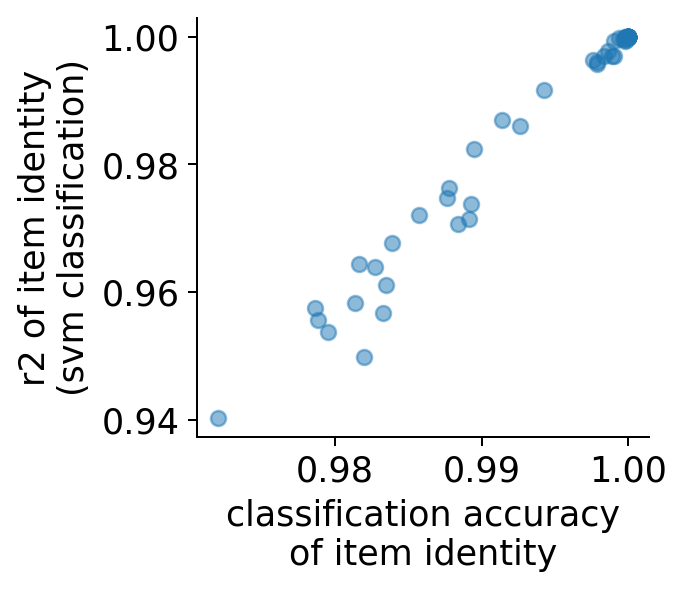

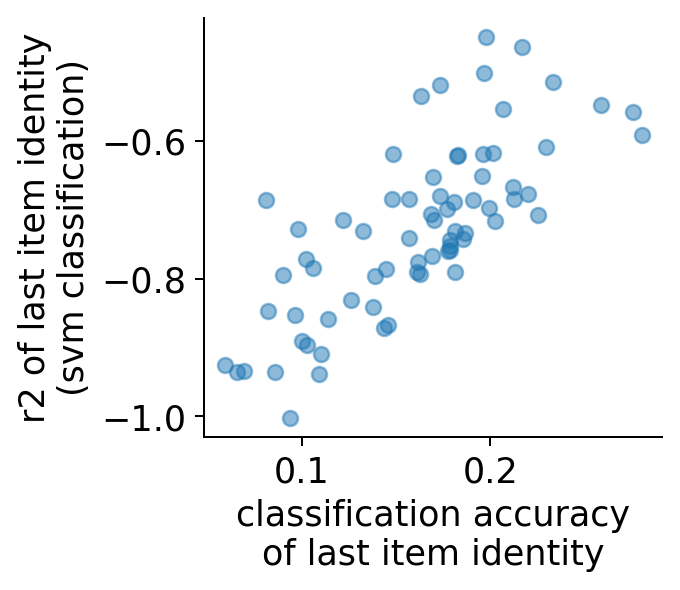

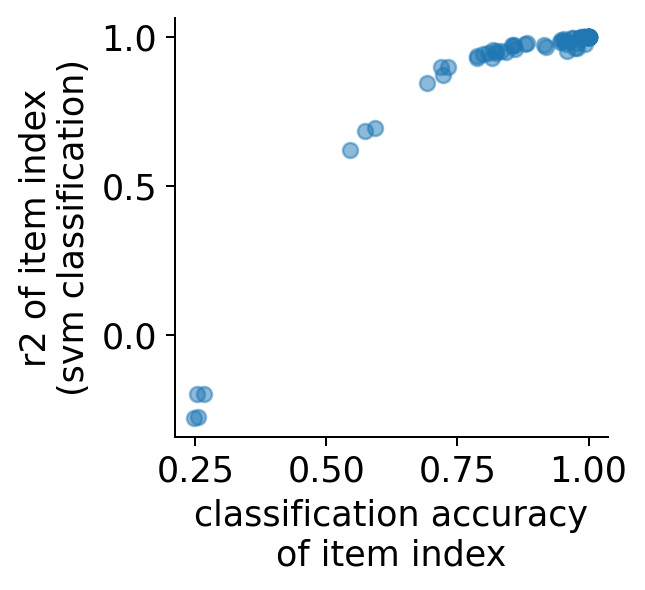

In [24]:

plot_scatter(item_enc_acc_svm_list, item_enc_r2_svm_list, "classification accuracy\nof item identity", "r2 of item identity\n(svm classification)")
plot_scatter(item_enc_acc_last_svm_list, item_enc_r2_last_svm_list, "classification accuracy\nof last item identity", "r2 of last item identity\n(svm classification)")
plot_scatter(index_enc_acc_svm_list, index_enc_r2_svm_list, "classification accuracy\nof item index", "r2 of item index\n(svm classification)")


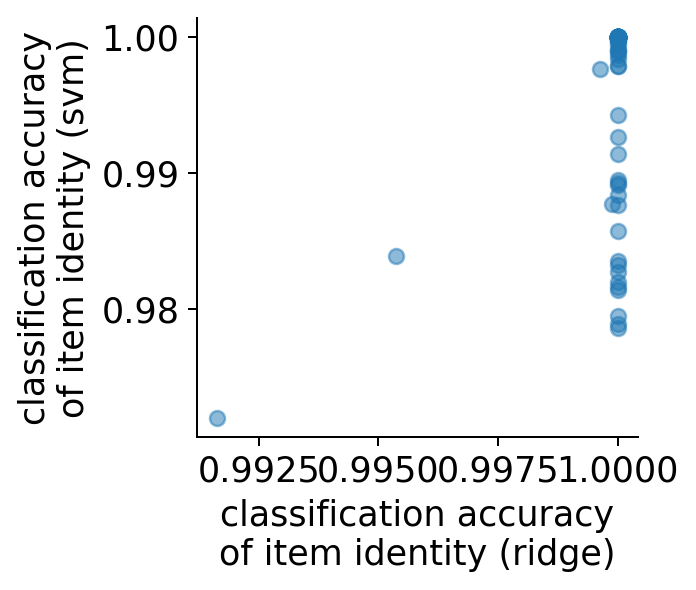

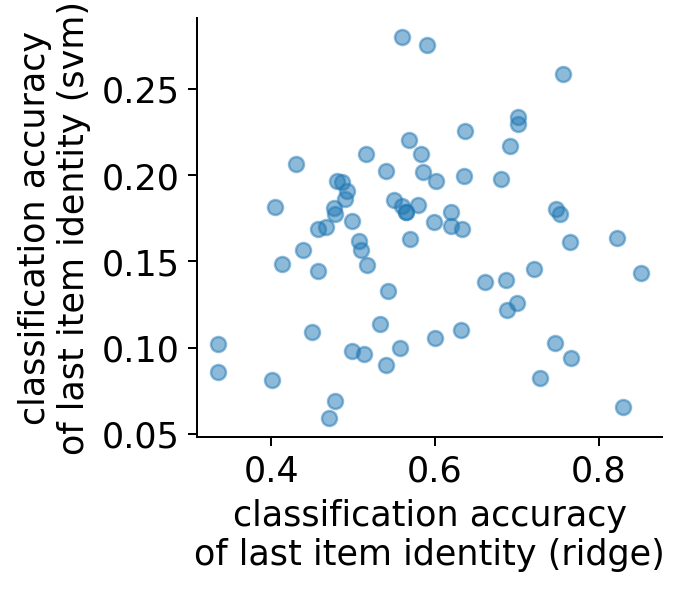

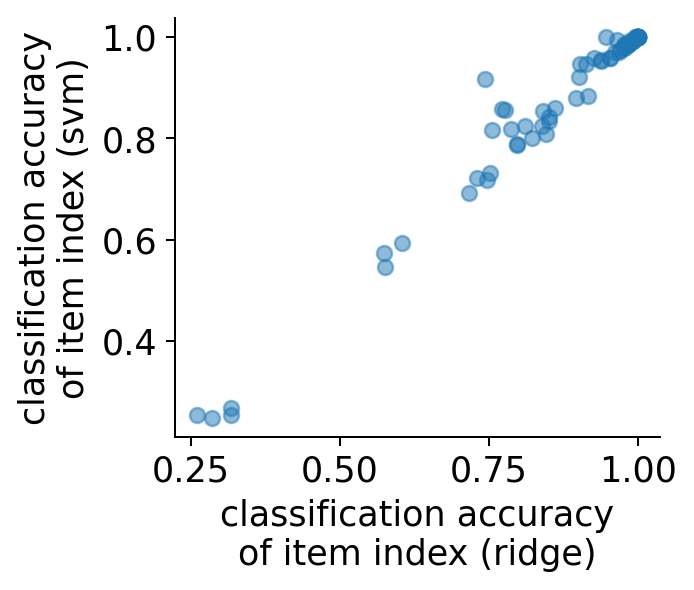

In [25]:
plot_scatter(item_enc_acc_list, item_enc_acc_svm_list, "classification accuracy\nof item identity (ridge)", "classification accuracy\nof item identity (svm)")
plot_scatter(item_enc_acc_last_list, item_enc_acc_last_svm_list, "classification accuracy\nof last item identity (ridge)", "classification accuracy\nof last item identity (svm)")
plot_scatter(index_enc_acc_list, index_enc_acc_svm_list, "classification accuracy\nof item index (ridge)", "classification accuracy\nof item index (svm)")

plot_scatter(item_enc_r2_classi_list, item_enc_r2_svm_list, "r2 of item identity\n(ridge classification)", "r2 of item identity\n(svm classification)")
plot_scatter(item_enc_r2_last_classi_list, item_enc_r2_last_svm_list, "r2 of last item identity\n(ridge classification)", "r2 of last item identity\n(svm classification)")
plot_scatter(index_enc_r2_classi_list, index_enc_r2_svm_list, "r2 of item index\n(ridge classification)", "r2 of item index\n(svm classification)")

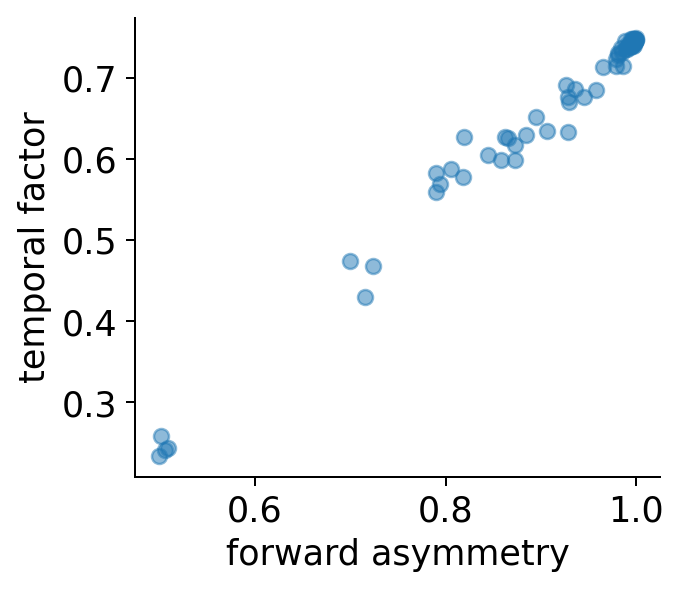

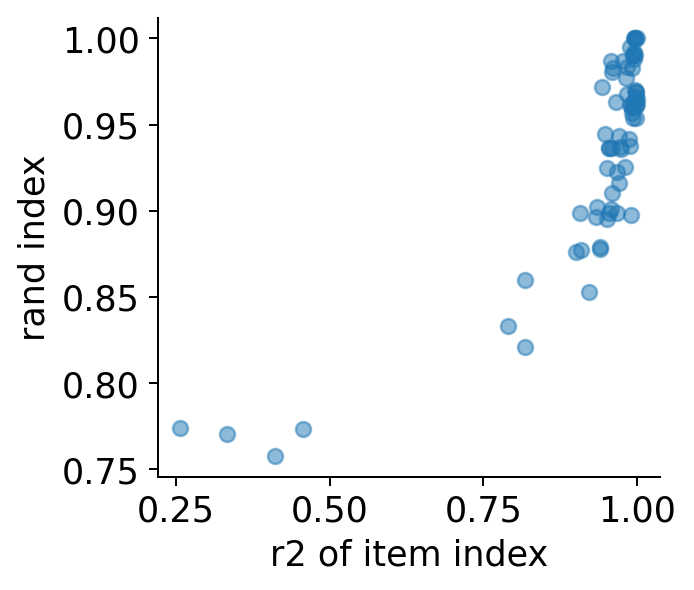

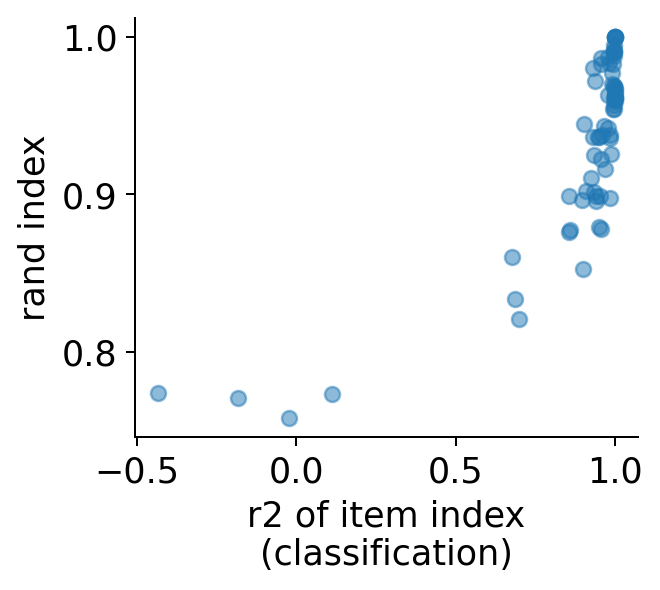

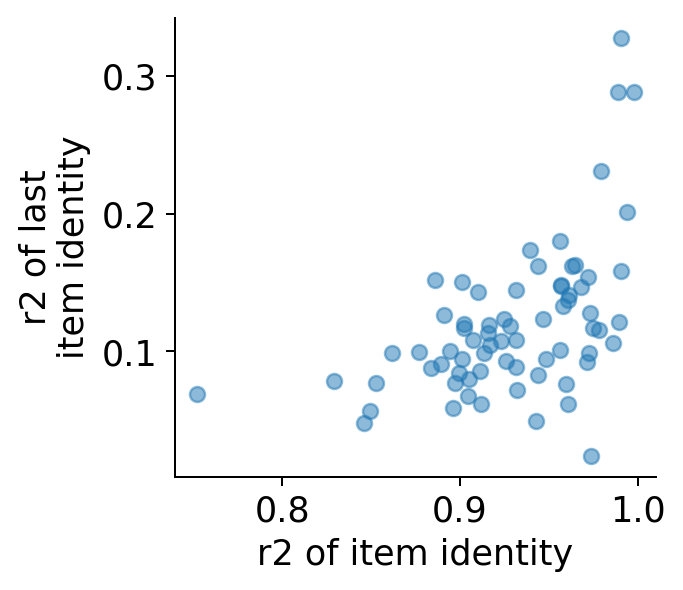

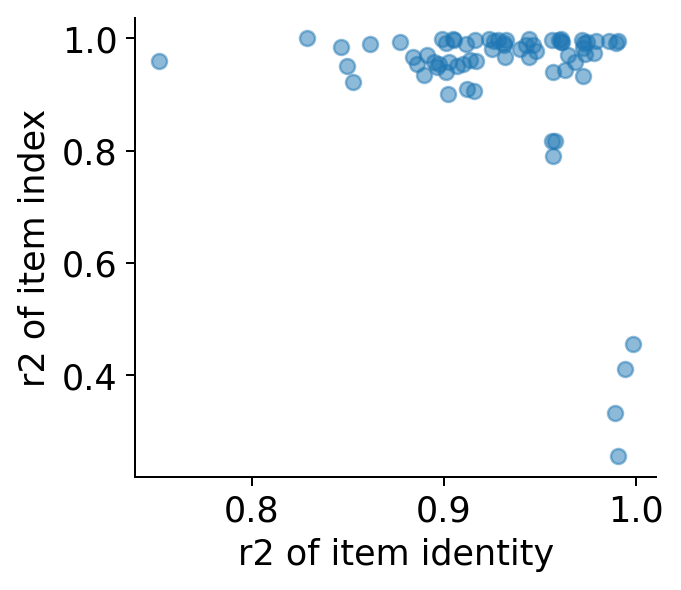

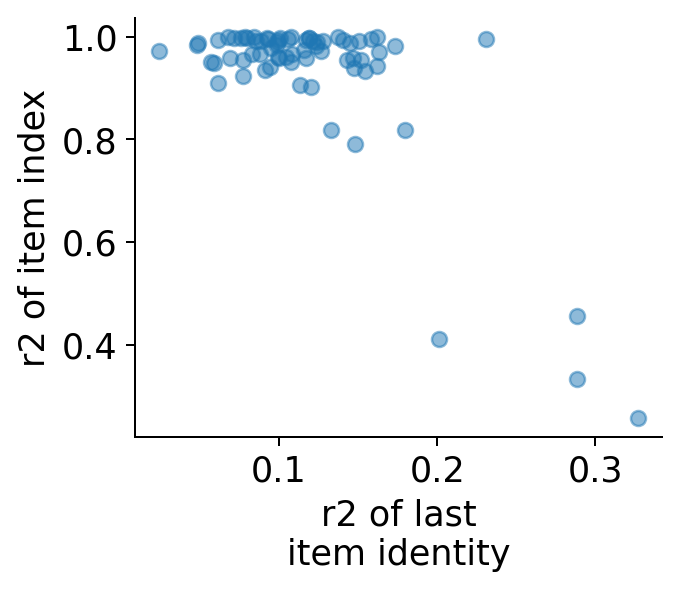

In [28]:
""" relation between metrics """

plot_scatter(forward_asymmetry_list, temporal_factor_list, "forward asymmetry", "temporal factor")
# plot_scatter(item_enc_r2_list, item_enc_ev_list, "r2 of item identity", "explained variance\nof item identity")
# plot_scatter(item_enc_r2_last_list, item_enc_ev_last_list, "r2 of last\nitem identity", "explained variance of\nlast item identity")
# plot_scatter(index_enc_r2_list, index_enc_ev_list, "r2 of item index", "explained variance\nof item index")
# plot_scatter(index_cluster_rand_index_list, index_cluster_adj_mutual_info_list, "rand index", "adjusted mutual info")
plot_scatter(index_enc_r2_list, index_cluster_rand_index_list, "r2 of item index", "rand index")
plot_scatter(index_enc_r2_classi_list, index_cluster_rand_index_list, "r2 of item index\n(classification)", "rand index")

plot_scatter(item_enc_r2_list, item_enc_r2_last_list, "r2 of item identity", "r2 of last\nitem identity")
plot_scatter(item_enc_r2_list, index_enc_r2_list, "r2 of item identity", "r2 of item index")
plot_scatter(item_enc_r2_last_list, index_enc_r2_list, "r2 of last\nitem identity", "r2 of item index")



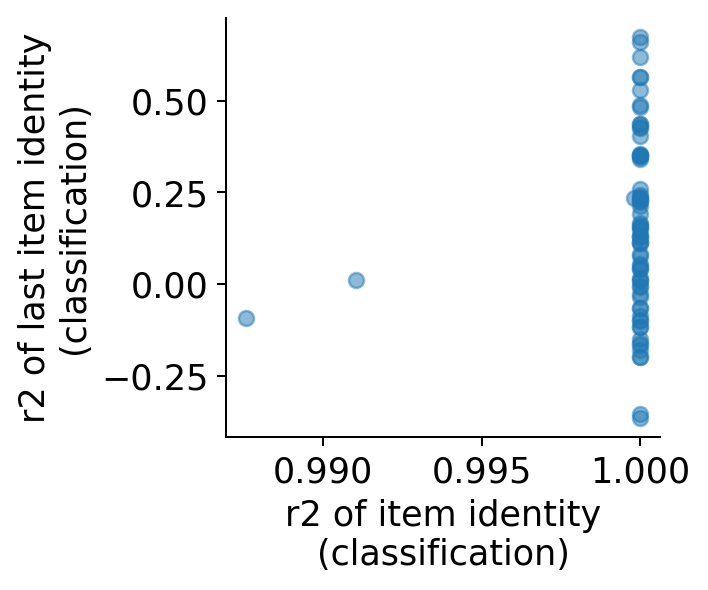

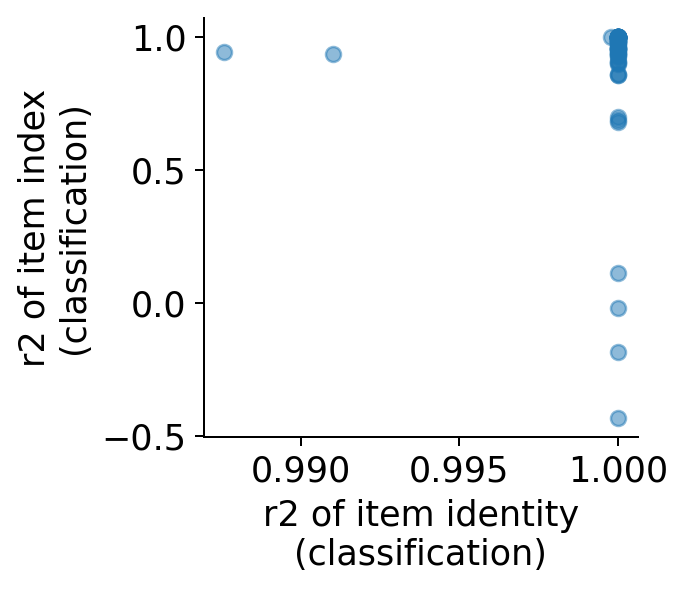

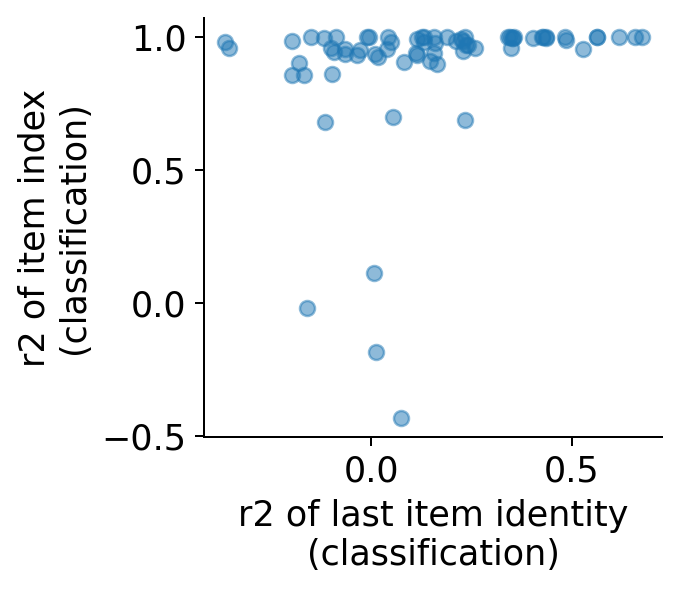

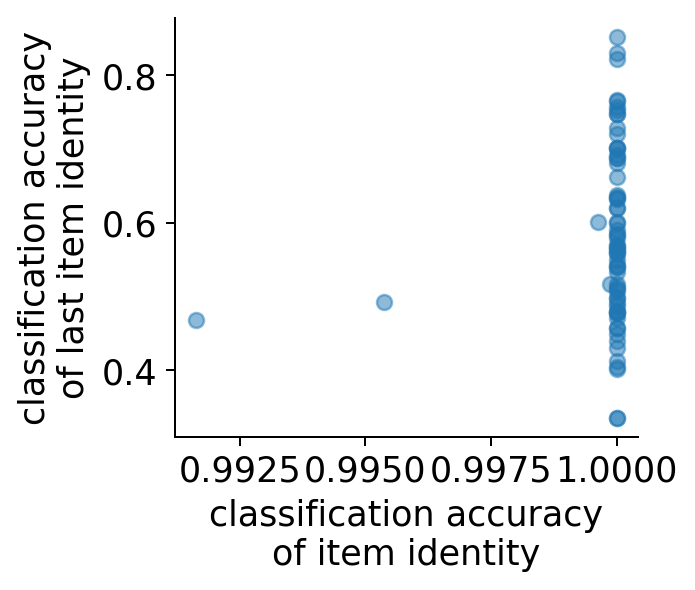

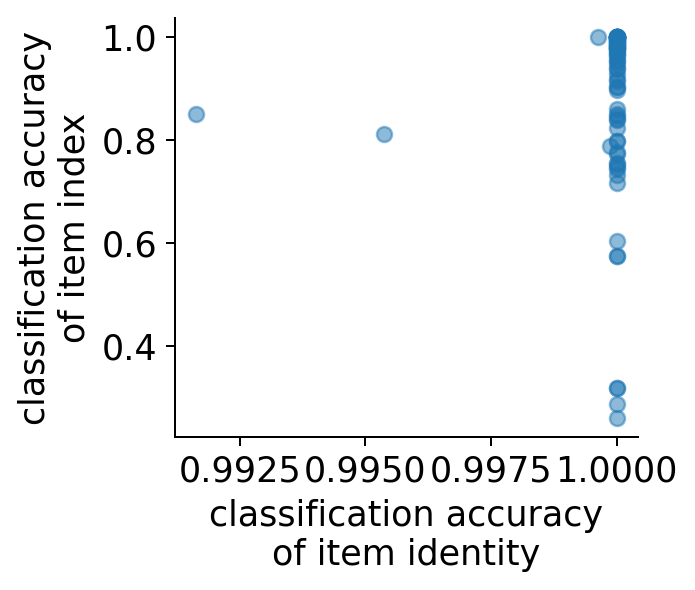

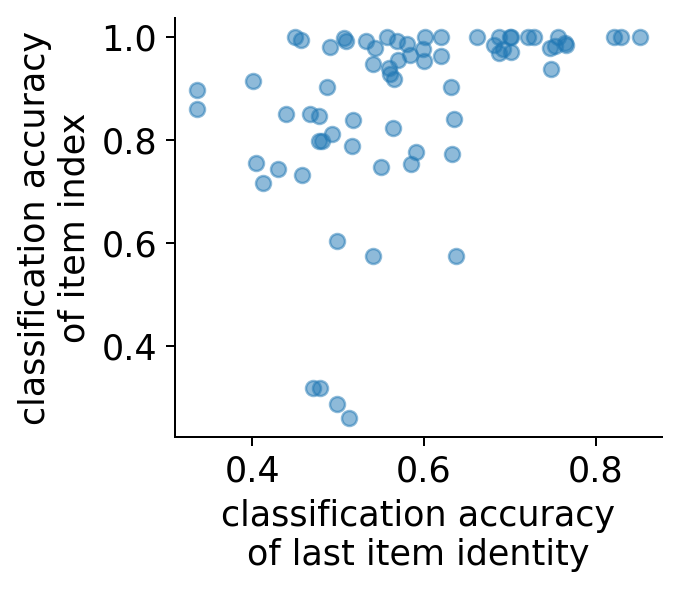

In [29]:
plot_scatter(item_enc_r2_classi_list, item_enc_r2_last_classi_list, "r2 of item identity\n(classification)", "r2 of last item identity\n(classification)")
plot_scatter(item_enc_r2_classi_list, index_enc_r2_classi_list, "r2 of item identity\n(classification)", "r2 of item index\n(classification)")
plot_scatter(item_enc_r2_last_classi_list, index_enc_r2_classi_list, "r2 of last item identity\n(classification)", "r2 of item index\n(classification)")

# plot_scatter(item_enc_acc_list, item_enc_acc_last_list, "classification accuracy\nof item identity", "classification accuracy\nof last item identity")
# plot_scatter(item_enc_acc_list, index_enc_acc_list, "classification accuracy\nof item identity", "classification accuracy\nof item index")
# plot_scatter(item_enc_acc_last_list, index_enc_acc_list, "classification accuracy\nof last item identity", "classification accuracy\nof item index")

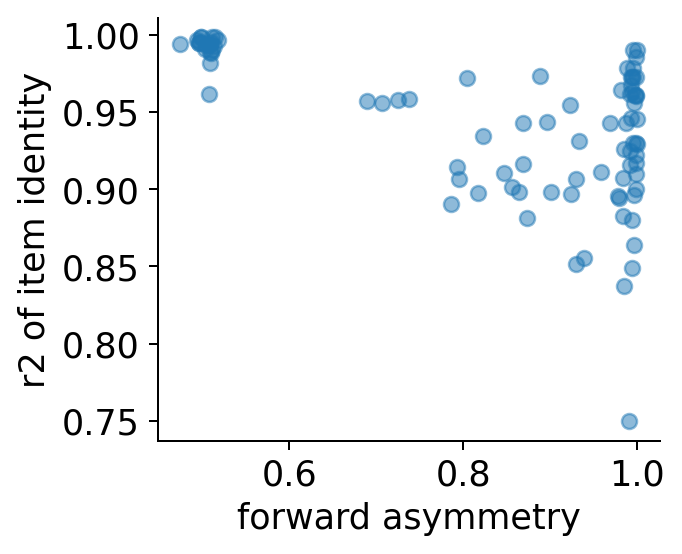

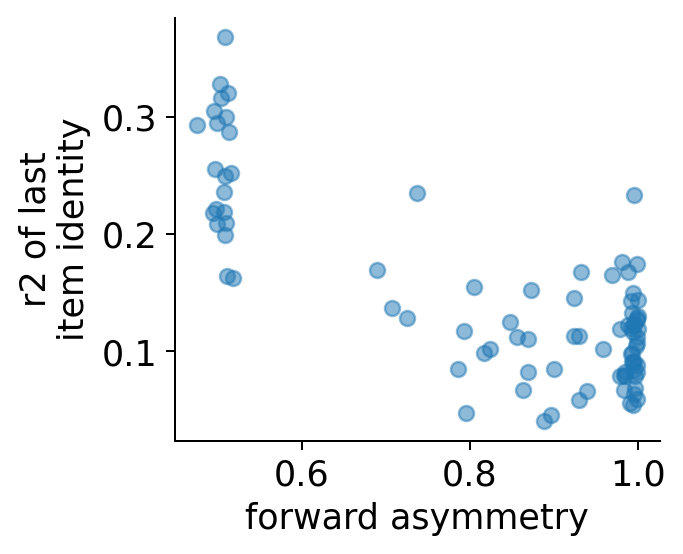

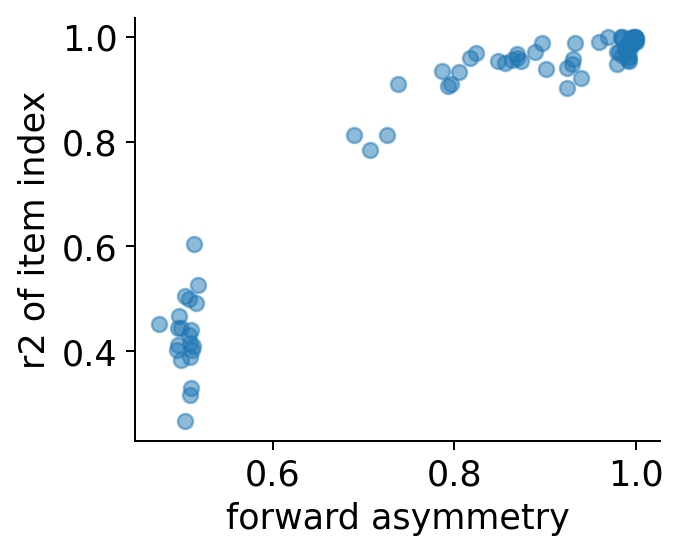

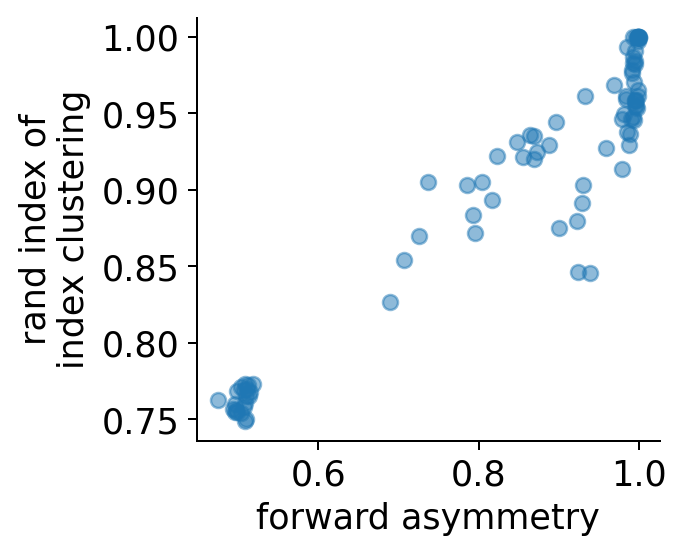

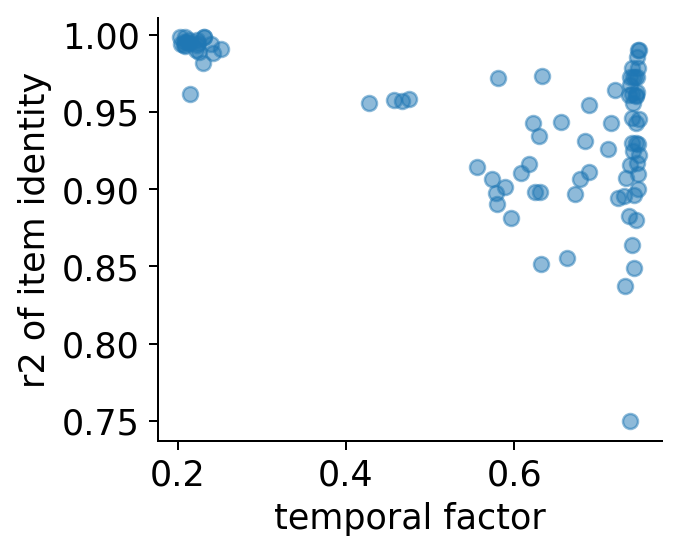

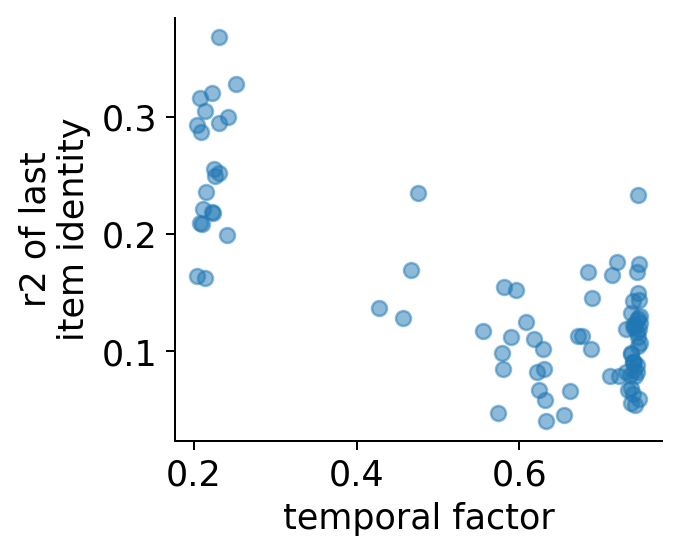

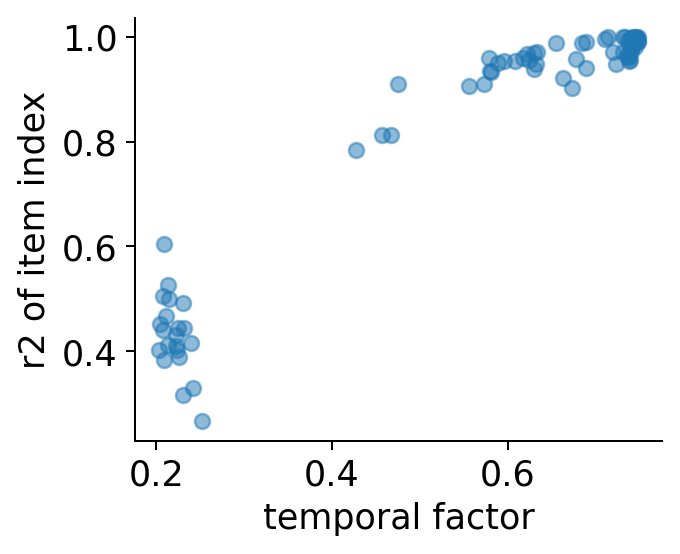

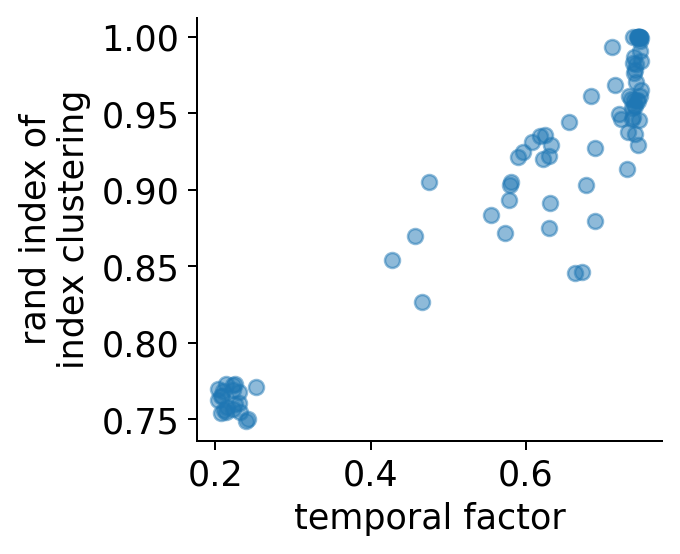

In [28]:
# forward asymmetry and temporal factor - metrics

plot_scatter(forward_asymmetry_list, item_enc_r2_list, "forward asymmetry", "r2 of item identity")
plot_scatter(forward_asymmetry_list, item_enc_r2_last_list, "forward asymmetry", "r2 of last\nitem identity")
plot_scatter(forward_asymmetry_list, index_enc_r2_list, "forward asymmetry", "r2 of item index")
plot_scatter(forward_asymmetry_list, index_cluster_rand_index_list, "forward asymmetry", "rand index of\nindex clustering")

plot_scatter(temporal_factor_list, item_enc_r2_list, "temporal factor", "r2 of item identity")
plot_scatter(temporal_factor_list, item_enc_r2_last_list, "temporal factor", "r2 of last\nitem identity")
plot_scatter(temporal_factor_list, index_enc_r2_list, "temporal factor", "r2 of item index")
plot_scatter(temporal_factor_list, index_cluster_rand_index_list, "temporal factor", "rand index of\nindex clustering")


In [ ]:
# forward asymmetry and temporal factor - classification metrics

plot_scatter(forward_asymmetry_list, item_enc_r2_classi_list, "forward asymmetry", "r2 of item identity\n(classification)")
plot_scatter(forward_asymmetry_list, item_enc_r2_last_classi_list, "forward asymmetry", "r2 of last\nitem identity\n(classification)")
plot_scatter(forward_asymmetry_list, index_enc_r2_classi_list, "forward asymmetry", "r2 of item index\n(classification)")

plot_scatter(temporal_factor_list, item_enc_r2_classi_list, "temporal factor", "r2 of item identity\n(classification)")
plot_scatter(temporal_factor_list, item_enc_r2_last_classi_list, "temporal factor", "r2 of last\nitem identity\n(classification)")
plot_scatter(temporal_factor_list, index_enc_r2_classi_list, "temporal factor", "r2 of item index\n(classification)")


In [ ]:
# performance - metrics

# plot_scatter(item_enc_r2_list, accuracy_list, "r2 of item identity", "accuracy")
# plot_scatter(item_enc_r2_last_list, accuracy_list, "r2 of last\nitem identity", "accuracy")
# plot_scatter(index_enc_r2_list, accuracy_list, "r2 of item index", "accuracy")
# plot_scatter(index_cluster_rand_index_list, accuracy_list, "rand index", "accuracy")

## Vary noise level

count accuracy of each hyperparam setting

In [2]:
for j, seqlen in enumerate([4,8,12,16]):
    exp_dir = Path("./experiments/RL/Noise/NBack0/figures/ValueMemoryGRU".format(seqlen))
    for noise in ["0", "02", "04", "06", "08", "1"]:
        exp_name = "setup_seq{}_noise{}".format(seqlen, noise)
        accuracy = 0.0
        forward_asymmetry = 0.0
        temporal_factor = 0.0
        cnt = 0
        for i in range(20):
            if not os.path.exists(exp_dir / exp_name / str(i) / "contiguity_effect.csv"):
                continue
            with open(exp_dir / exp_name / str(i) / "contiguity_effect.csv") as f:
                reader = csv.reader(f)
                for row in reader:
                    if float(row[0]) >= 0.5:
                        cnt += 1
                        accuracy += float(row[0])
                        forward_asymmetry += float(row[1])
                        temporal_factor += float(row[2])
        if cnt == 0:
            cnt = 1
        print(exp_name, cnt, np.round(accuracy / cnt, 4), np.round(forward_asymmetry / cnt, 4), np.round(temporal_factor / cnt, 4))
    print()
    print("#########################")


setup_seq4_noise0 20 0.9909 0.5872 0.4032
setup_seq4_noise02 20 0.9908 0.5573 0.4173
setup_seq4_noise04 20 0.9665 0.8097 0.4434
setup_seq4_noise06 20 0.9559 0.941 0.4767
setup_seq4_noise08 20 0.8844 0.9876 0.4961
setup_seq4_noise1 20 0.8245 0.9833 0.4966

#########################
setup_seq8_noise0 20 0.9894 0.1456 0.6478
setup_seq8_noise02 20 0.9858 0.1415 0.6499
setup_seq8_noise04 20 0.9882 0.1448 0.6503
setup_seq8_noise06 20 0.9722 0.377 0.5114
setup_seq8_noise08 20 0.9786 0.6355 0.469
setup_seq8_noise1 20 0.991 0.9906 0.7376

#########################
setup_seq12_noise0 20 0.9804 0.1576 0.7314
setup_seq12_noise02 20 0.9825 0.139 0.7464
setup_seq12_noise04 20 0.9821 0.1341 0.7484
setup_seq12_noise06 20 0.9308 0.3109 0.6107
setup_seq12_noise08 20 0.9313 0.4947 0.4075
setup_seq12_noise1 20 0.9385 0.5226 0.4135

#########################
setup_seq16_noise0 20 0.9585 0.2138 0.744
setup_seq16_noise02 19 0.9552 0.2066 0.7483
setup_seq16_noise04 20 0.9329 0.2496 0.706
setup_seq16_noise06 1

plot performance, FA, TF, proportion of index encoding of different seqlen and noise

In [3]:
# seqlen = [8, 16]
noise = [0, 0.2, 0.4, 0.6, 0.8, 1]

In [30]:
forward_asymmetry = []
temporal_factor = []
noises = []
item_enc_r2 = []
item_enc_r2_last = []
index_enc_r2 = []
index_cluster_rand_index = []


for i, n in enumerate(noise):
    exp_path = Path("./experiments/RL/Noise/NBack/figures/ValueMemoryGRUOld/setup_seq16_noise{}".format(str(n).replace(".", "")))
    for k in range(50):
        if not os.path.exists(exp_path / str(k) / "contiguity_effect.csv"):
            print(exp_path / str(k) / "contiguity_effect.csv")
            continue
        with open(exp_path / str(k) / "contiguity_effect.csv") as f:
            reader = csv.reader(f)
            for row in reader:
                # if float(row[0]) >= 0.7:
                ridge_regresson_stat = pickle.load(open(exp_path / str(k) / "ridge_regression_stat.pkl", "rb"))
                if ridge_regresson_stat['item_enc_r2'] < 0.7:
                    continue
                noises.append(n)
                forward_asymmetry.append(float(row[1]))
                temporal_factor.append(float(row[2]))
                item_enc_r2.append(ridge_regresson_stat['item_enc_r2'])
                item_enc_r2_last.append(ridge_regresson_stat['item_enc_r2_last'])
                index_enc_r2.append(ridge_regresson_stat['index_enc_r2'])
                kmeans_stat = pickle.load(open(exp_path / str(k) / "kmeans_stat.pkl", "rb"))
                index_cluster_rand_index.append(kmeans_stat['rand_index_enc'])

forward_asymmetry = np.array(forward_asymmetry)
temporal_factor = np.array(temporal_factor)
noises = np.array(noises)
item_enc_r2 = np.array(item_enc_r2)
item_enc_r2_last = np.array(item_enc_r2_last)
index_enc_r2 = np.array(index_enc_r2)
index_cluster_rand_index = np.array(index_cluster_rand_index)                


In [31]:
from matplotlib.colors import ListedColormap

colors = np.array([plt.cm.viridis(i) for i in np.linspace(0, 1, 6)])
cmap = ListedColormap(colors)
norm = plt.Normalize(vmin=-0.1, vmax=1.1)


def plot_groups(xdata, ydata, group, xlabel, ylabel, title=None, save_path=None, figsize=(4, 3.3)):
    plt.figure(figsize=figsize, dpi=180)

    for j in range(len(noise)):
            plt.scatter(xdata[noises==noise[j]], ydata[noises==noise[j]], 
                        s=10, color=colors[j], alpha=0.4)
            # group==i and noises==noise[j]

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ticks=np.linspace(0.0, 1.0, 6), label="noise proportion", ax=ax)

    plt.tight_layout()

    if save_path is not None and title is not None:
        savefig(save_path, title, format='svg')
    else:
        plt.show()

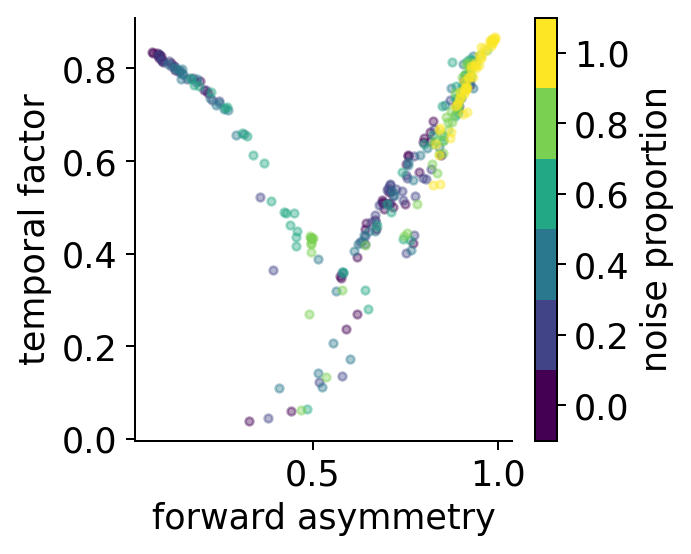

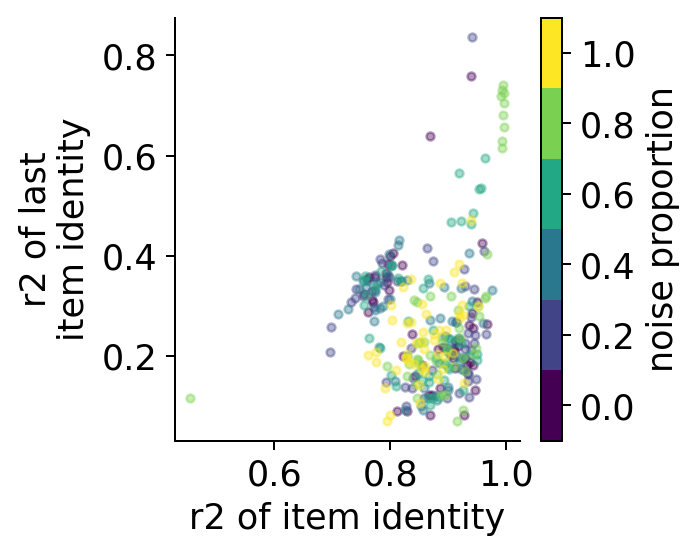

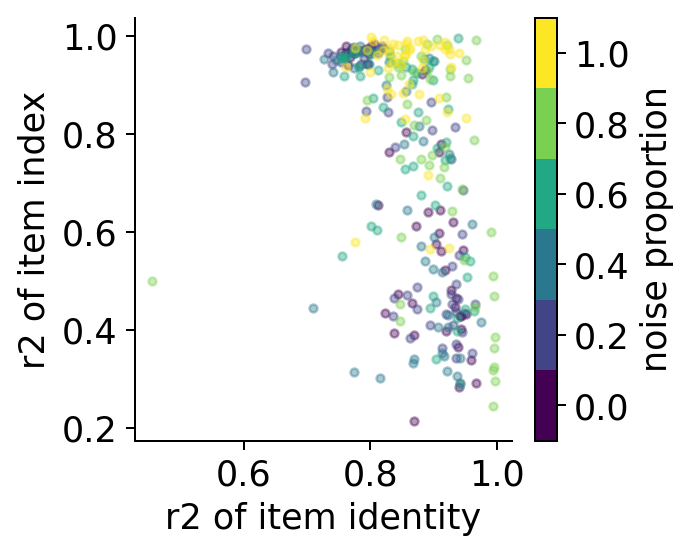

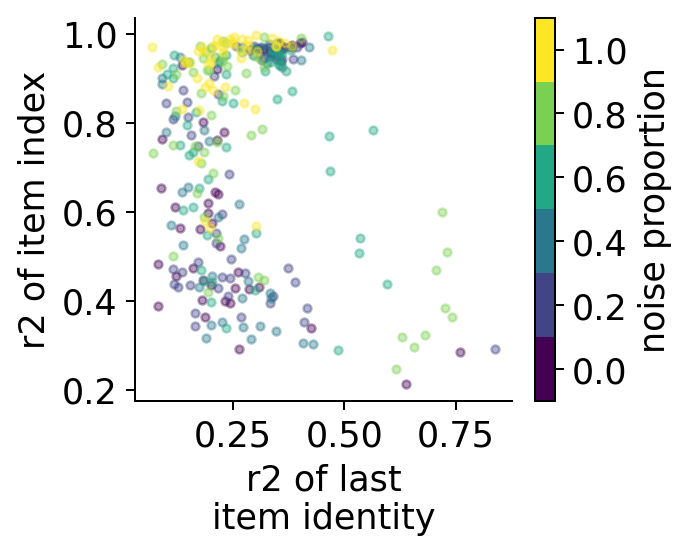

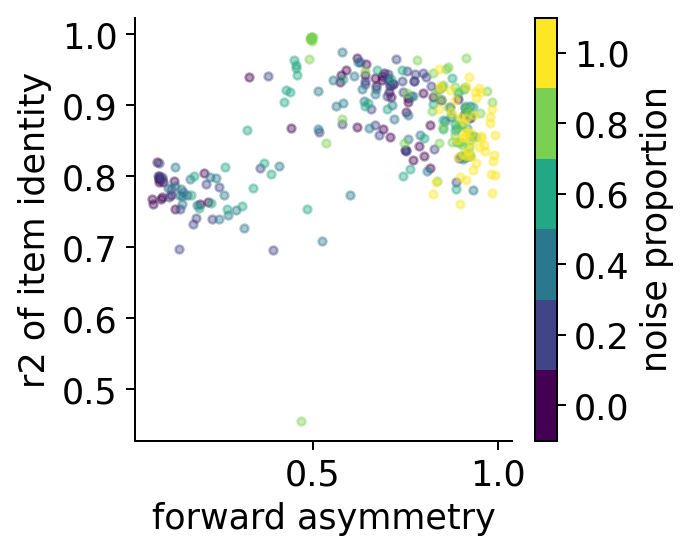

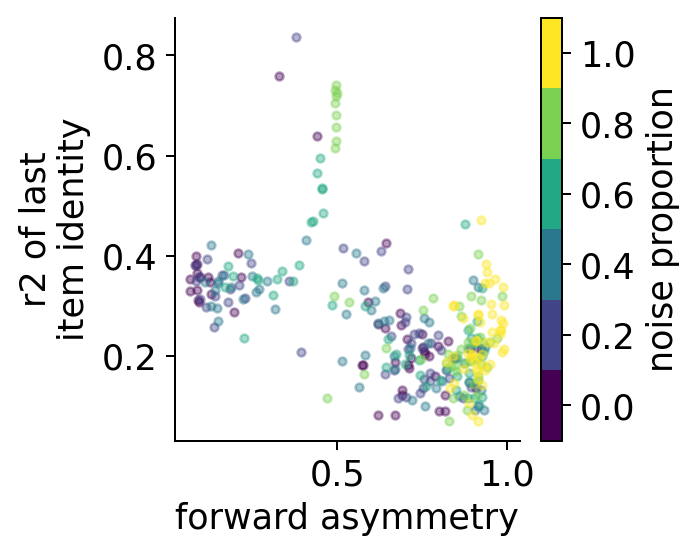

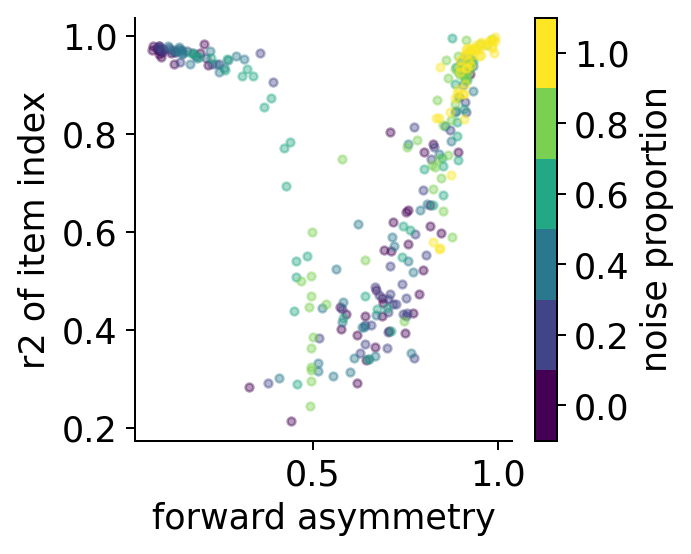

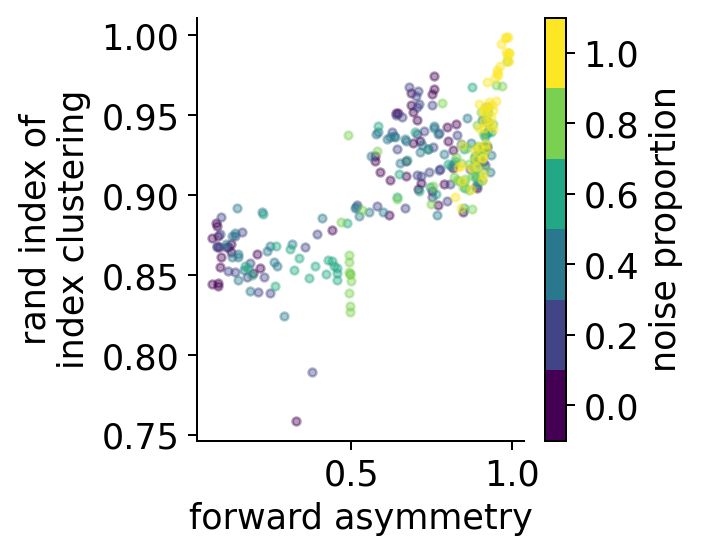

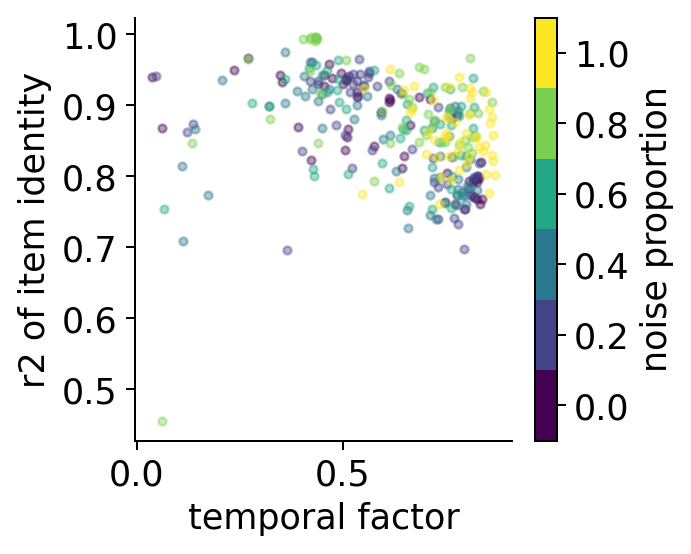

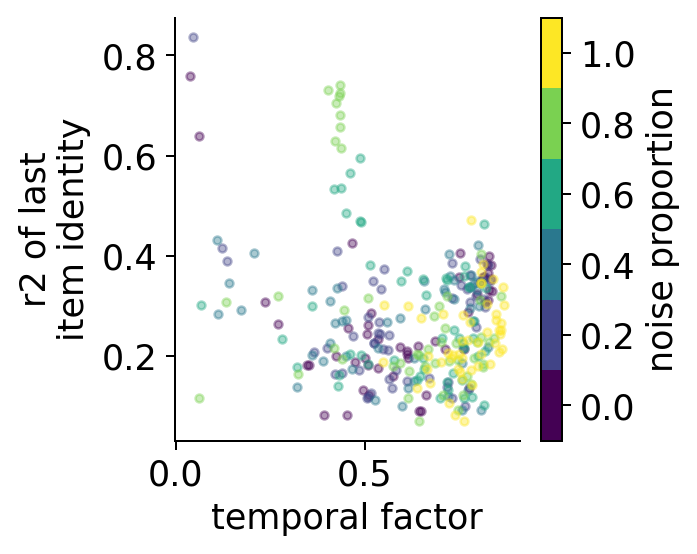

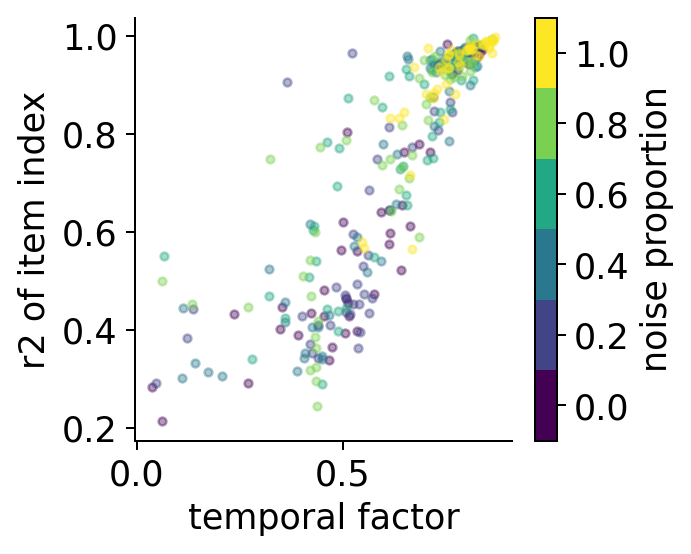

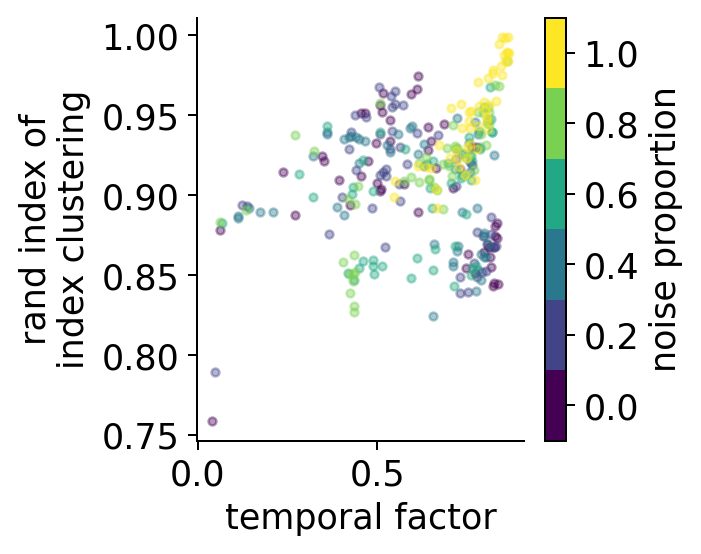

In [32]:
plot_groups(forward_asymmetry, temporal_factor, noises, "forward asymmetry", "temporal factor")
plot_groups(item_enc_r2, item_enc_r2_last, noises, "r2 of item identity", "r2 of last\nitem identity")
plot_groups(item_enc_r2, index_enc_r2, noises, "r2 of item identity", "r2 of item index")
plot_groups(item_enc_r2_last, index_enc_r2, noises, "r2 of last\nitem identity", "r2 of item index")

plot_groups(forward_asymmetry, item_enc_r2, noises, "forward asymmetry", "r2 of item identity")
plot_groups(forward_asymmetry, item_enc_r2_last, noises, "forward asymmetry", "r2 of last\nitem identity")
plot_groups(forward_asymmetry, index_enc_r2, noises, "forward asymmetry", "r2 of item index")
plot_groups(forward_asymmetry, index_cluster_rand_index, noises, "forward asymmetry", "rand index of\nindex clustering")

plot_groups(temporal_factor, item_enc_r2, noises, "temporal factor", "r2 of item identity")
plot_groups(temporal_factor, item_enc_r2_last, noises, "temporal factor", "r2 of last\nitem identity")
plot_groups(temporal_factor, index_enc_r2, noises, "temporal factor", "r2 of item index")
plot_groups(temporal_factor, index_cluster_rand_index, noises, "temporal factor", "rand index of\nindex clustering")
